In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
types = {'FID': np.str, 'id': np.int64, 'geom': np.str, 'oid': np.float64, 'sr_no': np.float64, 'girth_cm': np.int64, 
       'height_m': np.int64, 'canopy_dia_m': np.int64, 'condition': 'category', 'other_remarks': 'category', 'ownership': 'category',
       'society_name': np.str, 'road_name': np.str, 'northing': np.float64, 'easting': np.float64, 'balanced': np.bool,
       'remarks': 'category', 'special_collar': 'category', 'ward_name': 'category', 'botanical_name': 'category', 'saar_uid': np.int64,
       'common_name': 'category', 'local_name': 'category', 'economic_i': 'category', 'phenology': 'category', 'flowering': np.str,
       'ward': 'category', 'is_rare': np.object}
df1 = pd.read_csv('/content/drive/My Drive/Summer Project/Tree Census Data/p1.csv', dtype = types)
df2 = pd.read_csv('/content/drive/My Drive/Summer Project/Tree Census Data/p2.csv', dtype = types)
df3 = pd.read_csv('/content/drive/My Drive/Summer Project/Tree Census Data/p3.csv', dtype = types)
df4 = pd.read_csv('/content/drive/My Drive/Summer Project/Tree Census Data/p4.csv', dtype = types)
df5 = pd.read_csv('/content/drive/My Drive/Summer Project/Tree Census Data/p5.csv', dtype = types)  

In [0]:
list = [df1, df2, df3, df4, df5]
tree = pd.concat(list, axis=0, ignore_index=True, sort=False)

In [0]:
tree.head()

,FID,id,geom,oid,sr_no,girth_cm,height_m,canopy_dia_m,condition,other_remarks,ownership,society_name,road_name,northing,easting,balanced,remarks,special_collar,ward_name,botanical_name,saar_uid,common_name,local_name,economic_i,phenology,flowering,ward,is_rare
0,trees_display.fid--1672c0a_16c67517881_67e6,14038741,POINT (73.89543905900004 18.48682755200003),NaN,NaN,10,2,1,Healthy,NaN,Private,Utopia Society,Na,18.486828,73.895439,True,NaN,NaN,61,Tecoma stans (L.) Juss.ex Kunth,303912,Yellow Bells,Tecoma,Ornamental,Throughout year,Throughout year,61,false
1,trees_display.fid--1672c0a_16c67517881_67e7,14038742,POINT (73.81630115200007 18.557149113000033),NaN,NaN,115,10,4,Healthy,NaN,Private,Marbal Arch Society,"Vidhyapeeth Road ,Pune",18.557149,73.816301,True,NaN,NaN,8,Caryota urens Linn.,303913,Fish Tail Palm,Bherali Mad,Medicinal,Throughout year,Throughout year,8,false
2,trees_display.fid--1672c0a_16c67517881_67e8,14038743,POINT (73.79202280200006 18.505883990000022),NaN,NaN,15,2,2,Healthy,NaN,On Road,Mumbai Pune Highyway Area,Mumbai Pune Highyway Road,18.505884,73.792023,True,NaN,NaN,29,Leucaena leucocephala (Lamk.)De.wit.,303914,Subabul,Subabul,Timber wood,Seasonal,July-January,29,false
3,trees_display.fid--1672c0a_16c67517881_67e9,14038744,POINT (73.81626896600004 18.557148160000054),NaN,NaN,13,2,1,Healthy,NaN,Private,Marbal Arch Society,"Vidhyapeeth Road ,Pune",18.557148,73.816269,True,NaN,NaN,8,Mangifera indica Linn.,303915,Mango,Amba,Fruit,Seasonal,January-March,8,false
4,trees_display.fid--1672c0a_16c67517881_67ea,14038745,POINT (73.81626192500005 18.55715006700007),NaN,NaN,25,7,1,Healthy,NaN,Private,Marbal Arch Society,"Vidhyapeeth Road ,Pune",18.557150,73.816262,True,NaN,NaN,8,Leucaena leucocephala (Lamk.)De.wit.,303916,Subabul,Subabul,Timber wood,Seasonal,July-January,8,false


In [0]:
tree.shape

(4009623, 28)

In [0]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009623 entries, 0 to 4009622
Data columns (total 28 columns):
 #   Column          Dtype   
---  ------          -----   
 0   FID             object  
 1   id              int64   
 2   geom            object  
 3   oid             float64 
 4   sr_no           float64 
 5   girth_cm        int64   
 6   height_m        int64   
 7   canopy_dia_m    int64   
 8   condition       category
 9   other_remarks   category
 10  ownership       object  
 11  society_name    object  
 12  road_name       object  
 13  northing        float64 
 14  easting         float64 
 15  balanced        bool    
 16  remarks         object  
 17  special_collar  object  
 18  ward_name       object  
 19  botanical_name  object  
 20  saar_uid        int64   
 21  common_name     object  
 22  local_name      object  
 23  economic_i      object  
 24  phenology       category
 25  flowering       object  
 26  ward            object  
 27  is_rare     

 OBSERVATIONS : 
 - FID(s) and id(s) for all the trees are unique
 - oid, sr_no and other_remarks are completely empty 
 - special_collar also has 97.9 % null values 

In [0]:
tree[['FID', 'id', 'condition', 'ownership',
       'society_name', 'road_name', 'balanced',
       'remarks', 'special_collar', 'ward_name', 'botanical_name', 'saar_uid',
       'common_name', 'local_name', 'economic_i', 'phenology', 'flowering',
       'ward', 'is_rare']].nunique()

FID               4009623
id                4009623
condition               4
ownership              15
society_name        43579
road_name            6521
balanced                2
remarks                 6
special_collar          3
ward_name              77
botanical_name        424
saar_uid          4009482
common_name           425
local_name            427
economic_i             12
phenology               2
flowering              98
ward                   77
is_rare                 2
dtype: int64

In [0]:
tree.isnull().sum()/4009623*100

FID                 0.000000
id                  0.000000
geom                0.000000
oid               100.000000
sr_no             100.000000
girth_cm            0.000000
height_m            0.000000
canopy_dia_m        0.000000
condition           0.000000
other_remarks     100.000000
ownership           0.000000
society_name        8.367445
road_name           1.480887
northing            0.000000
easting             0.000000
balanced            0.000000
remarks            44.942280
special_collar     97.952276
ward_name           0.000000
botanical_name      0.670986
saar_uid            0.000000
common_name         0.000000
local_name          0.000000
economic_i          0.670986
phenology           1.077059
flowering           1.102622
ward                0.000000
is_rare             0.670986
dtype: float64

In [0]:
tree['condition'].unique()

[Healthy, Poor, Dead, Average]
Categories (4, object): [Healthy, Poor, Dead, Average]

In [0]:
tree['ownership'].unique()

array(['Private', 'On Road', 'Garden', 'On Foot Path', 'Government',
       'Public', 'On Wall', 'Semi Government', 'On Divider', 'Avenues',
       'Industrial', 'In Well', 'On Bridge', 'Footpath', 'Govt'],
      dtype=object)

In [0]:
tree['balanced'].unique()

array([ True, False])

In [0]:
tree['special_collar'].unique()

array([nan, 'Collar', '2', 'On The Wall'], dtype=object)

In [0]:
tree['economic_i'].unique()

array(['Ornamental', 'Medicinal', 'Timber wood', 'Fruit', 'Essential oil',
       'Paper industry', 'Vegetable', 'Firewood', 'Spice', nan,
       'Biodiesel', 'Edible oil', 'Fodder'], dtype=object)

In [0]:
tree['phenology'].unique()

[Throughout year, Seasonal, NaN]
Categories (2, object): [Throughout year, Seasonal]

In [0]:
tree['remarks'].unique()

array([nan, 'Mechanically cut', 'Uprooted', 'Diseased', 'Mechanical Cut',
       'On The Wall', 'Dangerous'], dtype=object)

In [0]:
tree['is_rare'].unique()

array(['false', 'true', nan], dtype=object)

## DATA CLEANING

In [0]:
tree.drop(['oid', 'sr_no', 'other_remarks'], axis=1, inplace=True)

In [0]:
tree.shape

(4009623, 25)

In [0]:
len(tree[tree['ward'] != tree['ward_name']])

0

Since, the columns 'ward' and 'ward_name' are identical, we can drop one. We have dropped 'ward_name'.

Checking the 'geom', 'northing' and 'easting' columns

In [0]:
tree['longitude'] = tree['geom'].apply(lambda x: x[x.find("(")+1 : x.find(")")].split()[0])
tree['latitude'] = tree['geom'].apply(lambda x: x[x.find("(")+1 : x.find(")")].split()[1])

Now, we can drop 'geom' column

In [0]:
tree.drop(['ward_name', 'geom'], axis=1, inplace=True)

In [0]:
tree[['longitude', 'latitude']] = tree[['longitude', 'latitude']].astype(np.float64)

In [0]:
import matplotlib as mpl
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

Text(0.5, 1.0, 'Easting vs Longitude')

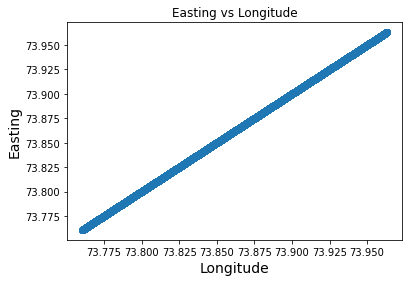

In [0]:
plt.scatter(x='longitude', y='easting', data=tree)
plt.xlabel('Longitude')
plt.ylabel('Easting')
plt.title('Easting vs Longitude')

Text(0.5, 1.0, 'Northing vs Latitude')

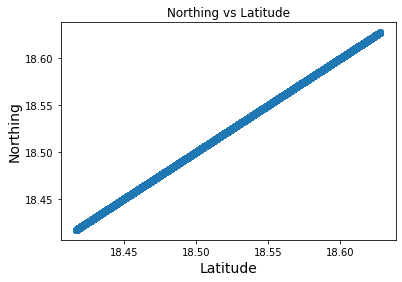

In [0]:
plt.scatter(x='latitude', y='northing', data=tree)
plt.xlabel('Latitude')
plt.ylabel('Northing')
plt.title('Northing vs Latitude')

In [0]:
tree.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [0]:
tree.head()

,FID,id,geom,girth_cm,height_m,canopy_dia_m,condition,ownership,society_name,road_name,northing,easting,balanced,remarks,special_collar,ward_name,botanical_name,saar_uid,common_name,local_name,economic_i,phenology,flowering,ward,is_rare
0,trees_display.fid--1672c0a_16c67517881_67e6,14038741,POINT (73.89543905900004 18.48682755200003),10,2,1,Healthy,Private,Utopia Society,Na,18.486828,73.895439,True,NaN,NaN,61,Tecoma stans (L.) Juss.ex Kunth,303912,Yellow Bells,Tecoma,Ornamental,Throughout year,Throughout year,61,false
1,trees_display.fid--1672c0a_16c67517881_67e7,14038742,POINT (73.81630115200007 18.557149113000033),115,10,4,Healthy,Private,Marbal Arch Society,"Vidhyapeeth Road ,Pune",18.557149,73.816301,True,NaN,NaN,8,Caryota urens Linn.,303913,Fish Tail Palm,Bherali Mad,Medicinal,Throughout year,Throughout year,8,false
2,trees_display.fid--1672c0a_16c67517881_67e8,14038743,POINT (73.79202280200006 18.505883990000022),15,2,2,Healthy,On Road,Mumbai Pune Highyway Area,Mumbai Pune Highyway Road,18.505884,73.792023,True,NaN,NaN,29,Leucaena leucocephala (Lamk.)De.wit.,303914,Subabul,Subabul,Timber wood,Seasonal,July-January,29,false
3,trees_display.fid--1672c0a_16c67517881_67e9,14038744,POINT (73.81626896600004 18.557148160000054),13,2,1,Healthy,Private,Marbal Arch Society,"Vidhyapeeth Road ,Pune",18.557148,73.816269,True,NaN,NaN,8,Mangifera indica Linn.,303915,Mango,Amba,Fruit,Seasonal,January-March,8,false
4,trees_display.fid--1672c0a_16c67517881_67ea,14038745,POINT (73.81626192500005 18.55715006700007),25,7,1,Healthy,Private,Marbal Arch Society,"Vidhyapeeth Road ,Pune",18.557150,73.816262,True,NaN,NaN,8,Leucaena leucocephala (Lamk.)De.wit.,303916,Subabul,Subabul,Timber wood,Seasonal,July-January,8,false


In [0]:
tree.shape

(4009623, 23)

## CLEANING INDIVIDUAL COLUMNS AND ROWS

In [0]:
# OWNERSHIP COLUMN
tree['ownership'].replace(to_replace=['Footpath', 'Government'],
           value= ['On Foot Path', 'Govt'], 
           inplace=True)
tree['ownership'].unique()

array(['Private', 'On Road', 'Garden', 'On Foot Path', 'Govt', 'Public',
       'On Wall', 'Semi Government', 'On Divider', 'Avenues',
       'Industrial', 'In Well', 'On Bridge'], dtype=object)

CHECKING THE CATEGORIES OF special_collar COLUMN AND ENCODING THEM

In [0]:
tree['special_collar'].value_counts()

Collar         82099
2                  6
On The Wall        1
Name: special_collar, dtype: int64

In [0]:
tree[tree['special_collar'] == 'On The Wall']

,FID,id,girth_cm,height_m,canopy_dia_m,condition,ownership,society_name,road_name,northing,easting,balanced,remarks,special_collar,botanical_name,saar_uid,common_name,local_name,economic_i,phenology,flowering,ward,is_rare
4007340,trees_display.fid--1672c0a_16c6758e284_e74,18046081,120,4,3,Healthy,Private,Pulachi Wadi,Jangali Maharaj Road,18.516229,73.843857,True,Mechanical Cut,On The Wall,Ficus religiosa Linn.,4031159,Pipal,Pimpal,Medicinal,Seasonal,April-August,24,false


In [0]:
tree['special_collar'].replace(to_replace='On The Wall', value=np.nan, inplace=True)
tree['special_collar'].unique()

array([nan, 'Collar', '2'], dtype=object)

In [0]:
# Encode NaN = 0, implying 0 collars; collar = 1, indicating presence of collars; let '2' be 2 only.
tree['special_collar'].replace(to_replace=[np.nan, 'Collar', '2'], value=[0, 1, 2], inplace=True)
tree['special_collar'].unique()

array([0, 1, 2])

In [0]:
# CHECKING THE CATEGORY '2' FOR special_collar column
tree[tree['special_collar'] == 2]

,FID,id,girth_cm,height_m,canopy_dia_m,condition,ownership,society_name,road_name,northing,easting,balanced,remarks,special_collar,botanical_name,saar_uid,common_name,local_name,economic_i,phenology,flowering,ward,is_rare
2859144,trees_display.fid--1672c0a_16c674d774b_-a3,16897885,38,5,3,Healthy,Govt,Taljai Forest \n,Talajai Ganeshmandirn Road\n,18.466061,73.844514,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2834448,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859145,trees_display.fid--1672c0a_16c674d774b_-a2,16897886,42,6,4,Healthy,Govt,Taljai Forest \n,Talajai Ganeshmandirn Road\n,18.466041,73.844514,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2834449,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859146,trees_display.fid--1672c0a_16c674d774b_-a1,16897887,42,6,4,Healthy,Govt,Taljai Forest \n,Talajai Ganeshmandirn Road\n,18.466053,73.844529,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2834450,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859846,trees_display.fid--1672c0a_16c674d774b_21b,16898587,42,6,4,Healthy,Govt,Taljai Forest \n,Talajai Ganeshmandirn Road\n,18.478931,73.842243,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2835246,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859850,trees_display.fid--1672c0a_16c674d774b_21f,16898591,38,5,3,Healthy,Govt,Taljai Forest \n,Talajai Ganeshmandirn Road\n,18.478897,73.842172,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2835247,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859851,trees_display.fid--1672c0a_16c674d774b_220,16898592,23,3,2,Healthy,Govt,Taljai Forest \n,Talajai Ganeshmandirn Road\n,18.478896,73.842225,True,Mechanically cut,2,Bauhinia purpurea L.,2835248,Orchid Tree,Kanchan,Ornamental,Seasonal,September-November,53,false


In [0]:
len(tree[tree['local_name'] == 'Pimpal'])

16416

In [0]:
len(tree[(tree['local_name'] == 'Pimpal') & (tree['common_name'] == 'Pipal')])

16416

Some of the society_names are followed by \n. Remove them.

In [0]:
tree['society_name'].replace(to_replace='Na', value=np.nan, inplace=True)

In [0]:
tree['road_name'].replace(to_replace='Na', value=np.nan, inplace=True)

In [0]:
len(tree[tree['society_name'] == 'Na'])

0

In [0]:
tree['society_name'].replace(to_replace=np.nan, value='Unknown', inplace=True)

In [0]:
tree['road_name'].replace(to_replace=np.nan, value='Unknown', inplace=True)

In [0]:
tree['society_name'] = tree['society_name'].apply(lambda x: x.rstrip('\n'))

In [0]:
tree['road_name'] = tree['road_name'].apply(lambda x: x[: x.find("\\n")])

In [0]:
tree[tree['special_collar'] == 2]

,FID,id,girth_cm,height_m,canopy_dia_m,condition,ownership,society_name,road_name,northing,easting,balanced,remarks,special_collar,botanical_name,saar_uid,common_name,local_name,economic_i,phenology,flowering,ward,is_rare
2859144,trees_display.fid--1672c0a_16c674d774b_-a3,16897885,38,5,3,Healthy,Govt,Taljai Forest,Talajai Ganeshmandirn Road,18.466061,73.844514,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2834448,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859145,trees_display.fid--1672c0a_16c674d774b_-a2,16897886,42,6,4,Healthy,Govt,Taljai Forest,Talajai Ganeshmandirn Road,18.466041,73.844514,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2834449,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859146,trees_display.fid--1672c0a_16c674d774b_-a1,16897887,42,6,4,Healthy,Govt,Taljai Forest,Talajai Ganeshmandirn Road,18.466053,73.844529,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2834450,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859846,trees_display.fid--1672c0a_16c674d774b_21b,16898587,42,6,4,Healthy,Govt,Taljai Forest,Talajai Ganeshmandirn Road,18.478931,73.842243,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2835246,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859850,trees_display.fid--1672c0a_16c674d774b_21f,16898591,38,5,3,Healthy,Govt,Taljai Forest,Talajai Ganeshmandirn Road,18.478897,73.842172,True,Mechanically cut,2,Gliricidia sepium (Jacq.) Walp.,2835247,Giripushpa,Giripushpa,Firewood,Seasonal,March-June,53,false
2859851,trees_display.fid--1672c0a_16c674d774b_220,16898592,23,3,2,Healthy,Govt,Taljai Forest,Talajai Ganeshmandirn Road,18.478896,73.842225,True,Mechanically cut,2,Bauhinia purpurea L.,2835248,Orchid Tree,Kanchan,Ornamental,Seasonal,September-November,53,false


In [0]:
tree[['society_name', 'road_name']].nunique()

society_name    43026
road_name        6289
dtype: int64

'remarks' column



In [0]:
tree['remarks'].replace(to_replace='Mechanical Cut',
           value='Mechanically cut', 
           inplace=True)
tree['remarks'].unique()

array([nan, 'Mechanically cut', 'Uprooted', 'Diseased', 'On The Wall',
       'Dangerous'], dtype=object)

In [0]:
tree['remarks'].unique()

array([nan, 'Mechanically cut', 'Uprooted', 'Diseased', 'On The Wall',
       'Dangerous'], dtype=object)

In [0]:
len(set(zip(tree['botanical_name'],tree['common_name'],tree['local_name'])))

427

In [0]:
len(tree[(tree['common_name'] == 'Unidentified') | (tree['common_name'] == 'Dead')])

26730

In [0]:
len(tree[(tree['local_name'] == 'Unidentified') | (tree['local_name'] == 'Dead')])

26730

In [0]:
len(tree[(tree['common_name'] == 'Unidentified') | (tree['common_name'] == 'Dead') != (tree['local_name'] == 'Unidentified') | (tree['local_name'] == 'Dead')])

0

In [0]:
tree[(tree['common_name'] == 'Unidentified') | (tree['common_name'] == 'Dead')][['condition', 'ownership', 'society_name', 'road_name',
                                                                                 'balanced', 'remarks', 'economic_i', 'phenology', 
                                                                                 'is_rare']].nunique()

condition          4
ownership         13
society_name    6456
road_name       2111
balanced           2
remarks            3
economic_i         0
phenology          0
is_rare            0
dtype: int64

In [0]:
len(tree[tree['common_name'] != tree['local_name']])

1789885

4. NORTHING AND EASTING

SCATTER PLOT OF NORTHINGS AND EASINGS WHICH SHOWS A MAP OF THE PUNE CITY 
(a few areas seem to be missing though)

Number of wards in Pune is 144? Data available on 77 wards. How do these points cover almost the entire city? 

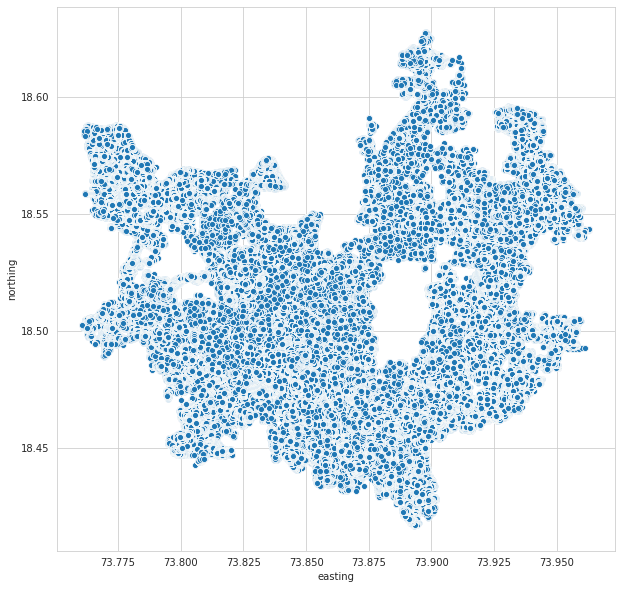

In [0]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='easting', y='northing', data=tree)

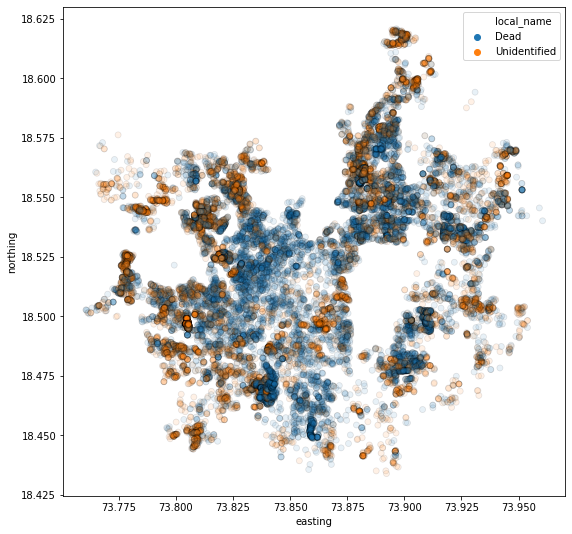

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot( x='easting', y='northing', data = tree[(tree['local_name'] == 'Unidentified') | (tree['local_name'] == 'Dead')], 
                edgecolor='black', alpha=0.1, hue='local_name')

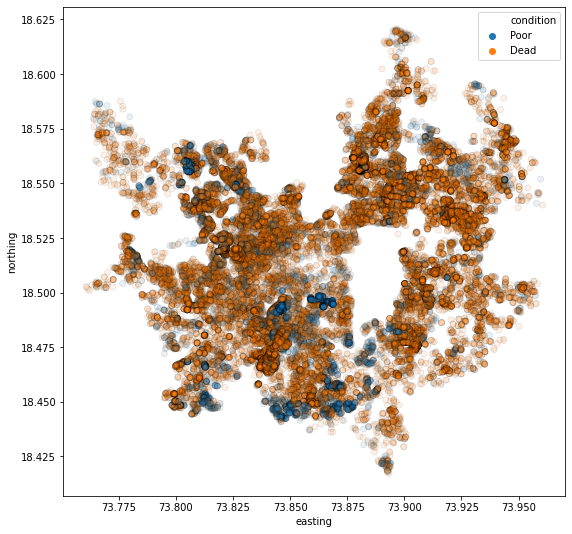

In [0]:
# Now plot the is_rare 
plt.figure(figsize=(9,9))
sns.scatterplot( x='easting', y='northing', data = tree, 
                edgecolor='black', alpha=0.1, hue=tree[(tree['condition'] != 'Healthy') & (tree['condition'] != 'Average')]['condition'])

In [0]:
tree.columns

Index(['FID', 'id', 'girth_cm', 'height_m', 'canopy_dia_m', 'condition',
       'ownership', 'society_name', 'road_name', 'northing', 'easting',
       'balanced', 'remarks', 'special_collar', 'botanical_name', 'saar_uid',
       'common_name', 'local_name', 'economic_i', 'phenology', 'flowering',
       'ward', 'is_rare'],
      dtype='object')

In [0]:
len(tree[tree['economic_i'].isnull()])

26904

In [0]:
tree['remarks'].unique()

array([nan, 'Mechanically cut', 'Uprooted', 'Diseased', 'On The Wall',
       'Dangerous'], dtype=object)

In [0]:
# Encoding the remarks column to deal with the missing values
tree['remarks'].replace(to_replace=[np.nan, 'Mechanically cut', 'Uprooted', 'On The Wall', 'Diseased', 'Dangerous'],
                        value=[0, 1, 2, 3, 4, 5], inplace=True)
tree['remarks'].unique()

array([0, 1, 2, 4, 3, 5])

In [0]:
tree.isnull().sum() / 4009623 * 100

FID               0.000000
id                0.000000
girth_cm          0.000000
height_m          0.000000
canopy_dia_m      0.000000
condition         0.000000
ownership         0.000000
society_name      0.000000
road_name         0.000000
northing          0.000000
easting           0.000000
balanced          0.000000
remarks           0.000000
special_collar    0.000000
botanical_name    0.670986
saar_uid          0.000000
common_name       0.000000
local_name        0.000000
economic_i        0.670986
phenology         1.077059
flowering         1.102622
ward              0.000000
is_rare           0.670986
dtype: float64

In [0]:
# How is tree condition related to is_rare?
sns.countplot(x='condition', data=tree, hue='is_rare' )

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='easting', y='northing', data=tree, hue='is_rare')

In [0]:
len(tree[tree['botanical_name'].isnull()])

26904

In [0]:
# CONDITION OF THE TREES
tree['condition'].value_counts()

Healthy    3834092
Average     125715
Dead         40890
Poor          8926
Name: condition, dtype: int64

In [0]:
# STUDY OF TREES WHOSE CONDITION IS EITHER POOR OR DEAD.
unhealthy = tree[(tree['condition'] == 'Poor') | (tree['condition'] == 'Dead')] 

In [0]:
# CHECK WHAT PORTION OF ALL NULL VALUES CORRESPONDS TO DEAD TREES
dead = tree[tree['condition'] == 'Dead']
dead.isnull().sum() / 4009623 * 100
# WHICH SHOWS ONLY A NEGLIGIBLY SMALL PORTION OF MISSING VALUES IS BECAUSE OF THE FACT THAT THE TREE IS DEAD 

FID               0.000000
id                0.000000
girth_cm          0.000000
height_m          0.000000
canopy_dia_m      0.000000
condition         0.000000
ownership         0.000000
society_name      0.046563
road_name         0.009926
northing          0.000000
easting           0.000000
balanced          0.000000
remarks           0.266459
special_collar    0.998997
botanical_name    0.363875
saar_uid          0.000000
common_name       0.000000
local_name        0.000000
economic_i        0.363875
phenology         0.368214
flowering         0.368239
ward              0.000000
is_rare           0.363875
dtype: float64

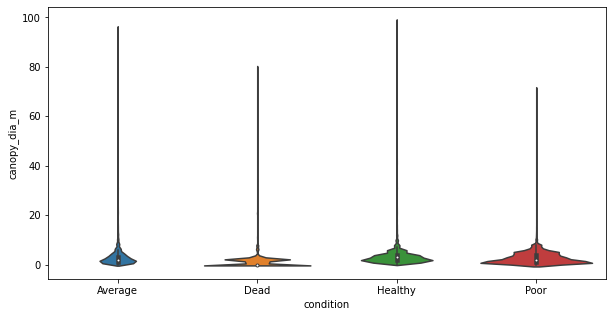

In [0]:
# TO CHECK WHETHER CANOPY_DIA_M = 0 CORRESPONDS TO DEAD TREES ONLY
plt.figure(figsize=(10,5))
sns.violinplot(x='condition', y='canopy_dia_m', data=tree, COLOR={'Healthy':'green', 'Average':'blue', })
# SHOWS THAT : Even some of the dead trees have a canopy diameter upto a significant 80m

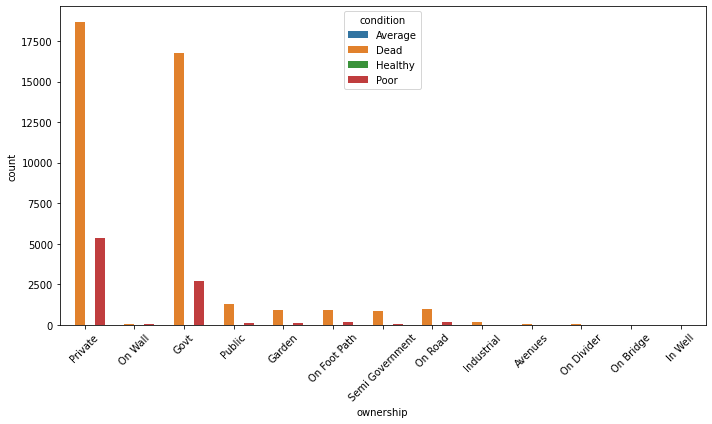

In [0]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='ownership', data=unhealthy, hue='condition')
plt.xticks(rotation=45)
plt.tight_layout()

# EDA AND DATA VIZUALISATION

In [0]:
sns.set_style('whitegrid')

In [0]:
# Convert Girth From cm to m
tree['girth_m'] = tree['girth_cm'] * 0.01

In [0]:
# STATISTICAL SUMMARY OF THE NUMERICAL COLUMNS
tree.describe()

,id,girth_cm,height_m,canopy_dia_m,northing,easting,saar_uid,girth_m
count,4.009623e+06,4.009623e+06,4.009623e+06,4.009623e+06,4.009623e+06,4.009623e+06,4.009623e+06,4.009623e+06
mean,1.604355e+07,3.694565e+01,5.462129e+00,2.994605e+00,1.850929e+01,7.386017e+01,2.015889e+06,3.694565e-01
std,1.157479e+06,3.518486e+01,2.745427e+00,2.287195e+00,4.056700e-02,4.835395e-02,1.162938e+06,3.518486e-01
min,1.403874e+07,8.000000e+00,2.000000e+00,0.000000e+00,1.841669e+01,7.376067e+01,1.000000e+02,8.000000e-02
25%,1.504115e+07,1.500000e+01,3.000000e+00,2.000000e+00,1.847765e+01,7.382743e+01,1.008924e+06,1.500000e-01
50%,1.604355e+07,2.700000e+01,5.000000e+00,3.000000e+00,1.850204e+01,7.384478e+01,2.017206e+06,2.700000e-01
75%,1.704596e+07,4.500000e+01,7.000000e+00,4.000000e+00,1.854238e+01,7.390291e+01,3.022336e+06,4.500000e-01
max,1.804836e+07,1.524000e+03,2.500000e+01,9.900000e+01,1.862787e+01,7.396308e+01,4.033441e+06,1.524000e+01


## COLUMN-WISE DATA VISUALISATION
1. HEIGHT, GIRTH AND CANOPY DIAMETER

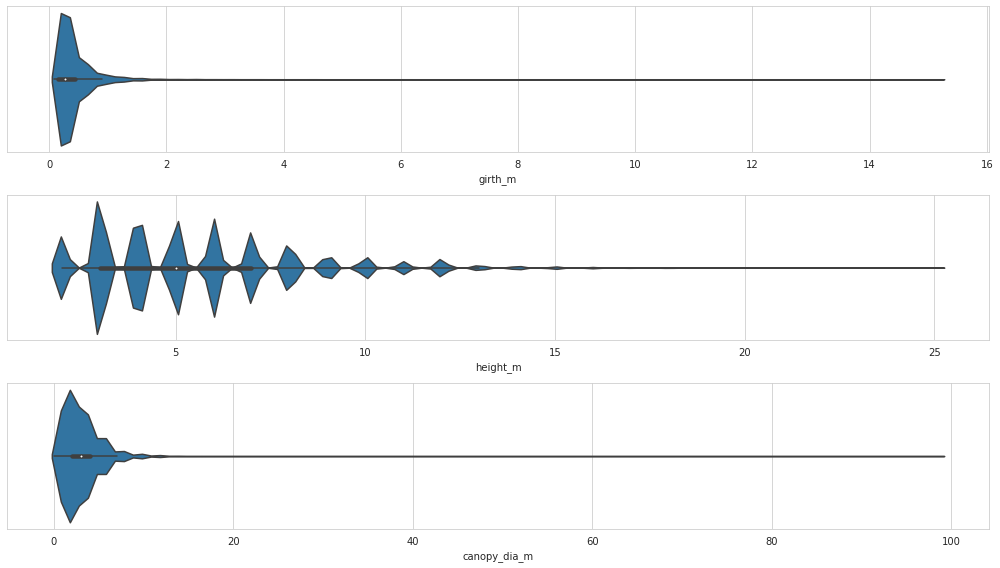

In [0]:
fig = plt.figure(figsize=(14, 8))

ax = fig.add_subplot(311)
sns.violinplot(tree['girth_m'], ax=ax, kde=False)

ax = fig.add_subplot(312)
sns.violinplot(tree['height_m'], ax=ax, kde=False)

ax = fig.add_subplot(313)
sns.violinplot(tree['canopy_dia_m'], ax=ax, kde=False)

plt.tight_layout()

2. CONDITION COLUMN

In [0]:
tree['condition'].value_counts() / 4009623 * 100

Healthy    95.622257
Average     3.135332
Dead        1.019797
Poor        0.222614
Name: condition, dtype: float64

In [0]:
sns.countplot(x='condition',data=tree)

3. OWNERSHIP

In [0]:
tree['ownership'].value_counts() / 4009623 * 100

Govt               51.709450
Private            35.471839
Public              6.860296
Garden              1.568402
On Road             1.406791
On Foot Path        1.370727
Semi Government     1.007701
Industrial          0.285588
On Divider          0.152159
Avenues             0.092652
On Wall             0.068959
In Well             0.004664
On Bridge           0.000773
Name: ownership, dtype: float64

5. BALANCED 


In [0]:
tree['balanced'].value_counts() / 4009623 * 100

True     99.362259
False     0.637741
Name: balanced, dtype: float64

In [0]:
# WHAT PERCENTAGE OF THE BALANCED TREES ARE IN A POOR CONDITION OR ARE DEAD?
[tree['balanced'] == True]

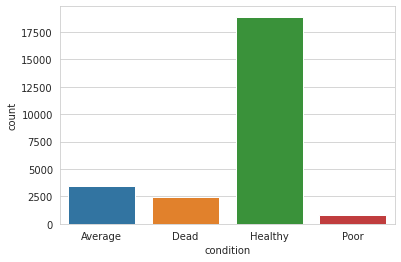

In [0]:
sns.countplot(x='condition', data=tree[tree['balanced'] == False])

In [0]:
# Out of the total unbalanced trees how many are in a poor condiio or are dead
len(tree[(tree['balanced'] == False) & ((tree['condition'] == 'Poor') | (tree['condition'] == 'Dead'))]) 

3272

6. REMARKS COLUMN 

(TREE STRESS)

In [0]:
tree['remarks'].value_counts() / 4009623 * 100

Mechanically cut    54.650549
Diseased             0.216055
Uprooted             0.190866
On The Wall          0.000224
Dangerous            0.000025
Name: remarks, dtype: float64

In [0]:
tree['remarks'] = tree['remarks'].replace(to_replace = [np.nan, 'Mechanically Cut','Diseased', 'Uprooted', 'On The Wall', 'Dangerous'], 
                                         value = [0, 1, 2, 3, 4, 5], inplace=True)

BOTANICAL, COMMON AND LOCAL NAMES

In [0]:
# Top 10 species of trees found in Pune
tree['botanical_name'].value_counts().head(10)

Gliricidia sepium (Jacq.) Walp.         914951
Leucaena leucocephala (Lamk.)De.wit.    732010
Dalbergia melanoxylon Guill. & Perr.    288509
Acacia nilotica (Linn.) Del.            112365
Prosopis juliflora (Sw.)Dc.             110034
Azadirachta indica Juss.                108625
Acacia catechu (L.f.) Willd.             84288
Polyalthia longifolia var.pendula        75377
Mangifera indica Linn.                   73761
Cocos nucifera Linn.                     68092
Name: botanical_name, dtype: int64

ECONOMIC_I COLUMN

In [0]:
tree['economic_i'].value_counts()

Timber wood       1462985
Firewood           919755
Ornamental         621360
Medicinal          487415
Fruit              346328
Essential oil       63523
Paper industry      50002
Vegetable           16076
Spice               12103
Biodiesel            2711
Edible oil            311
Fodder                150
Name: economic_i, dtype: int64

Text(0.5, 1.0, 'Economic Value of Tree')

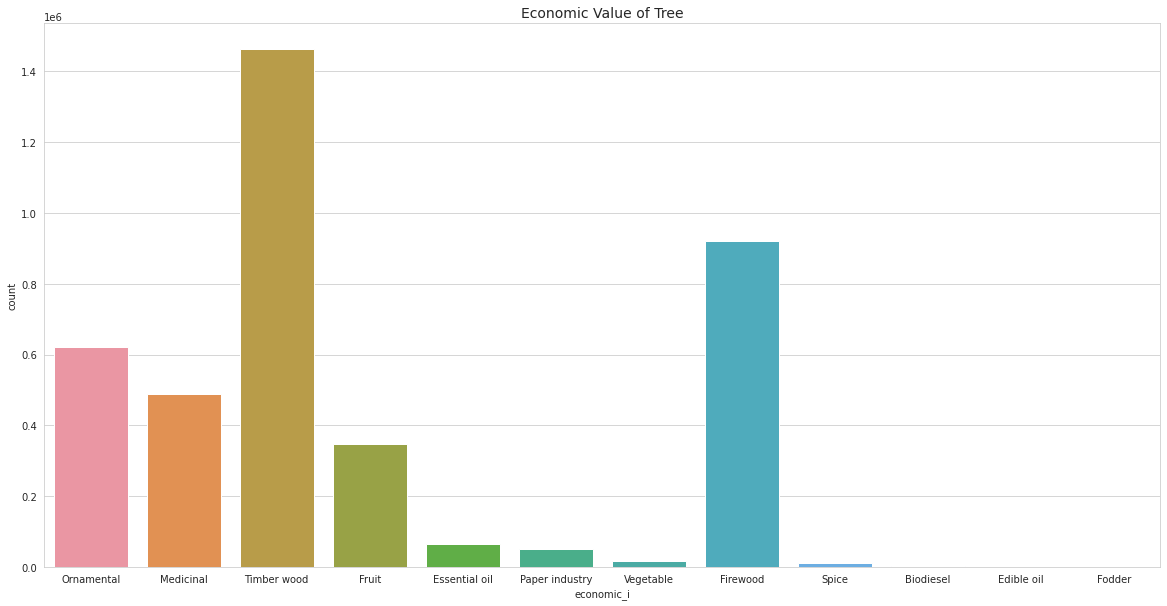

In [0]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x='economic_i', data=tree)
plt.title('Economic Value of Tree', size=14)

In [0]:
good = tree[(tree['condition'] == 'Healthy') & ()]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

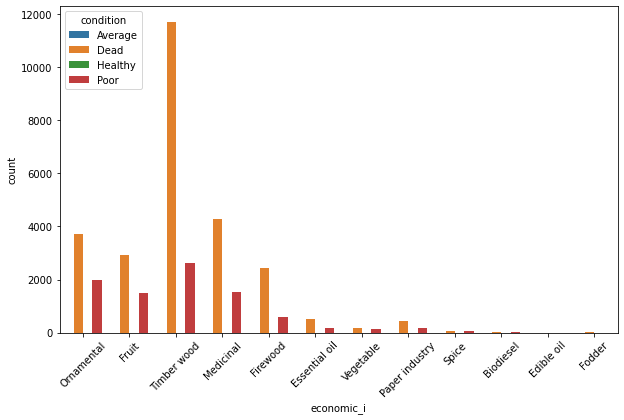

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x='economic_i',data=unhealthy ,hue='condition')
plt.xticks(rotation=45) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

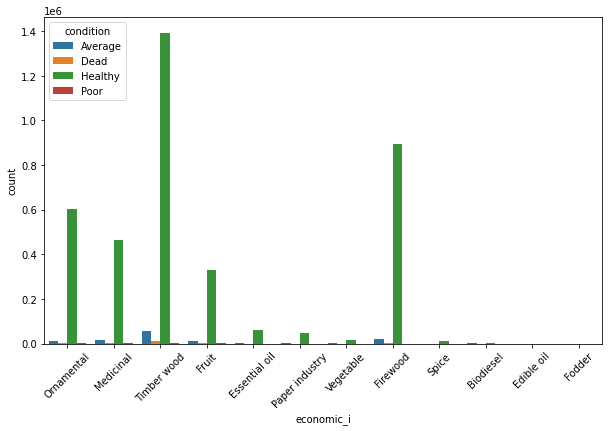

In [0]:
  plt.figure(figsize=(10,6))
sns.countplot(x='economic_i', data=tree ,hue='condition')
plt.xticks(rotation=45)

PHENOLOGY

In [0]:
tree['phenology'].value_counts() /4009623*100

Seasonal           91.383080
Throughout year     7.539861
Name: phenology, dtype: float64

Text(0.5, 1.0, 'Phenology of Tree')

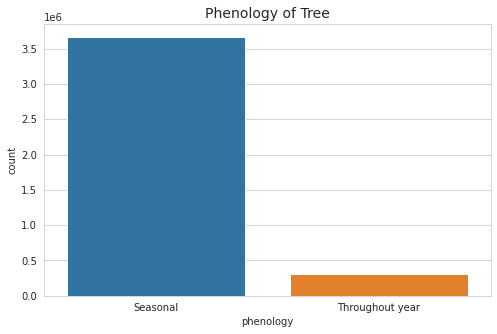

In [0]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x='phenology', data=tree)
plt.title('Phenology of Tree', size=14)

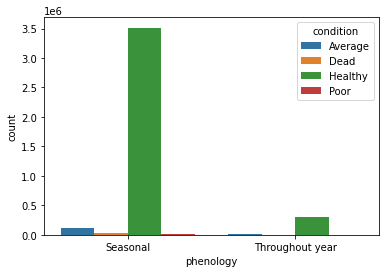

In [0]:
sns.countplot(x='phenology', data=tree,hue='condition')

FLOWERING

In [0]:
tree['flowering'].nunique()

98

IS_RARE COLUMN

In [0]:
tree['is_rare'].value_counts()/4009623*100

false    98.046849
true      1.282165
Name: is_rare, dtype: float64

Text(0.5, 1.0, 'Tree is Rare or not')

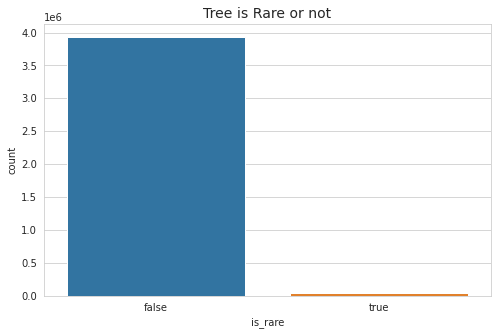

In [0]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x='is_rare', data=tree)
plt.title('Tree is Rare or not', size=14)